# 선형회귀 데모

## 라이브러리 및 임포트 설정

In [16]:
#!pip install tqdm.notebook

%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 4)
warnings.simplefilter('ignore')

## 학습 데이터 로드

In [4]:
data_dir = Path(r'C:\Users\789\Desktop\github_local\Machine Learning\machine-learning-projects\data\astronomical-object')
trn_file = data_dir / 'train.csv'
seed = 42

In [5]:
trn = pd.read_csv(trn_file, index_col = 0)
print(trn.shape)
trn.head()

(199991, 22)


,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.1982,21.4320,21.3141,21.1766,21.1714,22.5813,21.6445,21.6576,21.3877,21.5728,22.5043,21.4316,21.4783,21.1454,20.4224,22.7492,21.4655,21.3642,21.0206,21.1473
1,QSO,788,21.4314,20.7081,20.6789,20.7034,20.4732,21.8688,21.0298,20.9671,20.9377,21.0636,21.3607,20.7790,20.8897,20.6398,20.6467,21.4930,20.7585,20.7539,20.6934,20.5123
2,QSO,427,17.8515,16.7279,16.6797,16.6946,16.6418,18.1719,17.0331,16.9997,17.0960,17.0764,17.8673,16.7388,16.6889,16.7442,16.8080,17.8181,16.6974,16.6412,16.6602,16.6889
3,QSO,864,20.7899,20.0404,19.9269,19.8438,19.4633,21.0390,20.3172,20.2179,20.0739,19.7945,20.4339,19.9937,19.9855,19.7509,19.4551,20.7707,20.0017,19.8898,19.7581,19.5529
4,STAR_RED_DWARF,612,26.4550,23.0588,21.4714,19.5050,18.3891,25.7006,23.6291,21.7428,19.8617,18.8104,25.8592,22.4269,21.6736,19.6100,18.3761,24.8771,23.1480,21.4753,19.4873,18.3757


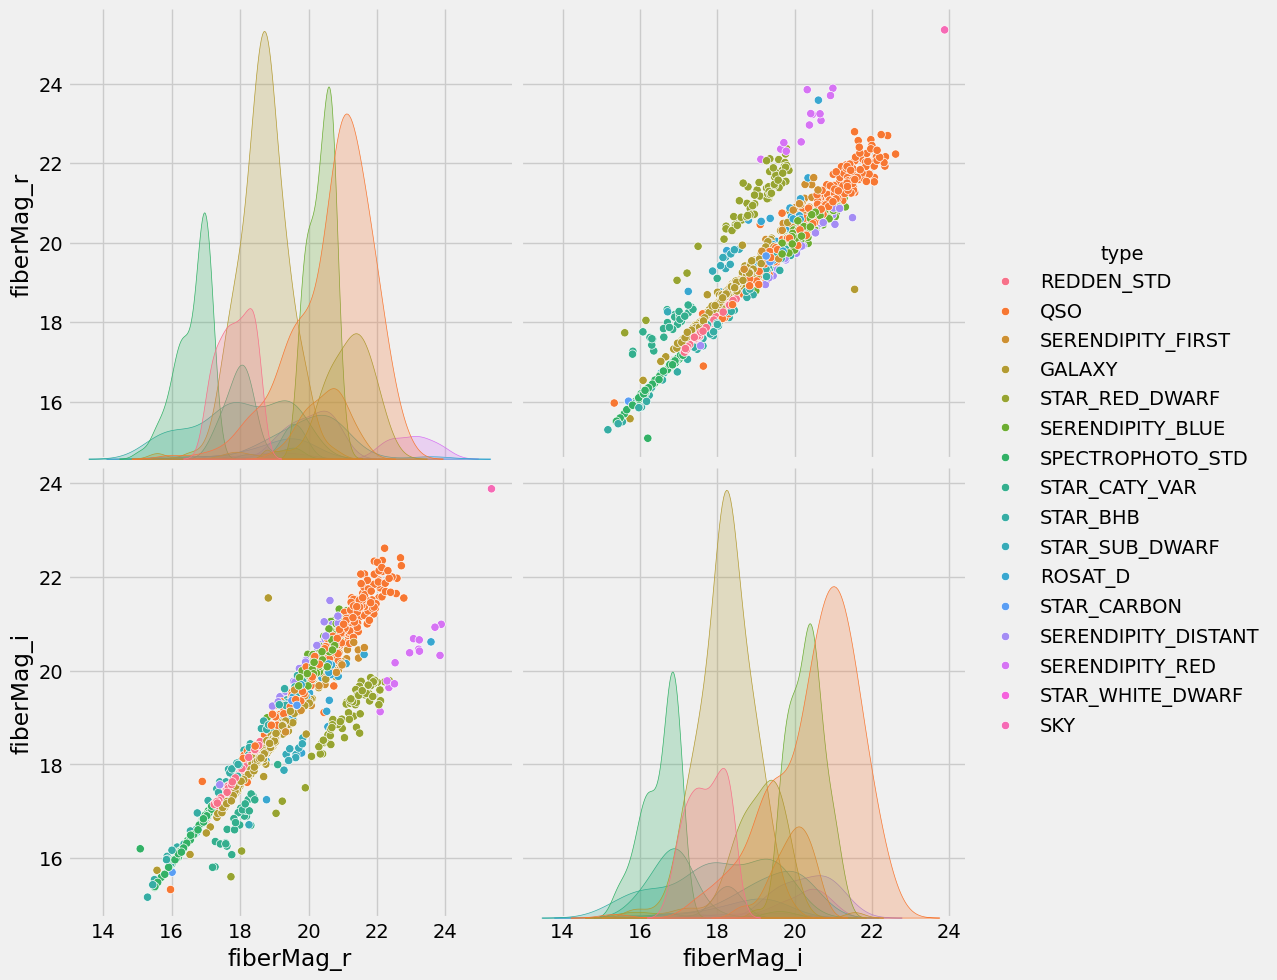

In [8]:
sns.pairplot(data = trn.sample(n=1000), vars = ['fiberMag_r','fiberMag_i'], hue = 'type', size = 5)

Let's do simple linear regression with fiberMag_r and fiberMag_i

In [58]:
X = trn[['fiberMag_r']].values
y = trn['fiberMag_i'].values
print(X.shape, y.shape)

(199991, 1) (199991,)


### RMSE loss function definition

In [59]:
rmse = lambda y, p : np.sqrt(np.mean((y-p)**2))

넘파이를 이용한 선형회귀. Hardcoding

In [60]:
alpha = .0001
b = .1
w = .1
epoch = 10

In [61]:
x = X.flatten() # 1차원으로 차원 맞춰주기
x = (x - np.mean(x)) / np.std(x) # 입력값 정규화
print(x.shape)

(199991,)


In [62]:
rmses = []
for i in tqdm(range(epoch)):
  for x_i, y_i in zip(x,y):
    p_i = x_i * w + b
    w = w + alpha * (y_i - p_i) * x_i
    b = b + alpha * (y_i - p_i)
  rmses.append(rmse(y, p_i))

  0%|          | 0/10 [00:00<?, ?it/s]

In [63]:
w, b

(np.float64(308.846588201261), np.float64(18.285304966021535))

In [64]:
rmses

[np.float64(122.49304606702593),
 np.float64(122.49758023966241),
 np.float64(122.49768856008242),
 np.float64(122.49769112297729),
 np.float64(122.49769118360237),
 np.float64(122.49769118503647),
 np.float64(122.49769118507037),
 np.float64(122.49769118507119),
 np.float64(122.49769118507122),
 np.float64(122.49769118507122)]

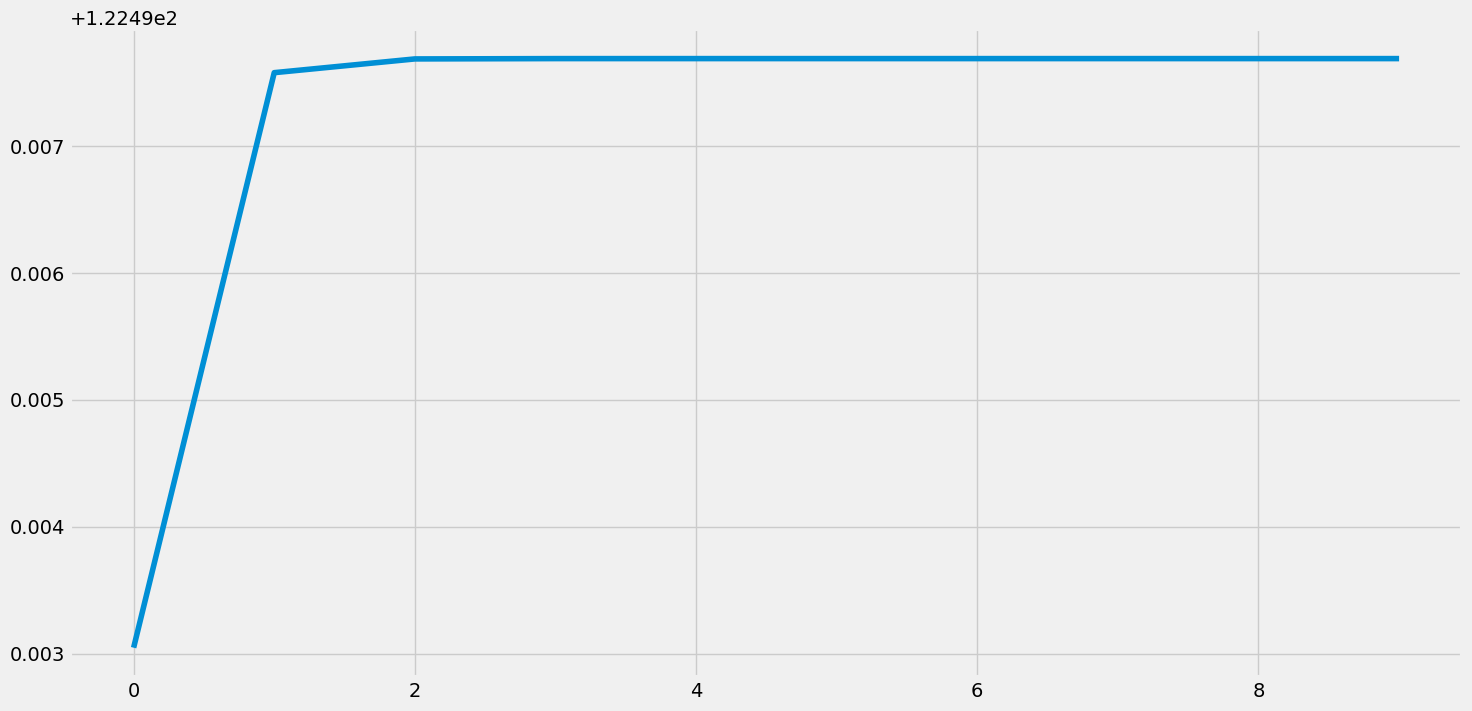

In [65]:
plt.plot(rmses)

Text(0, 0.5, 'dered_u')

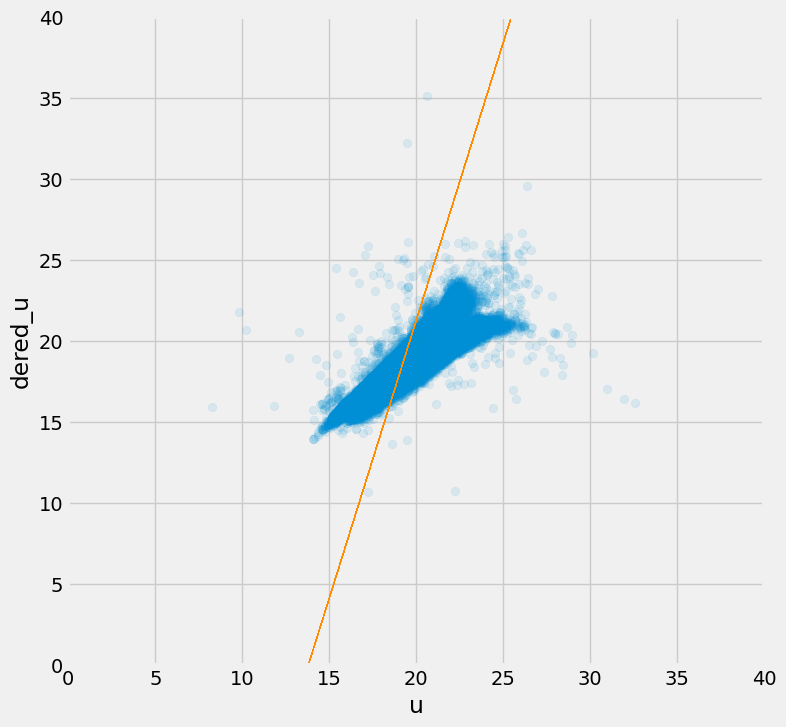

In [66]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, b + w * x, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

### scikit-learn을 이용한 선형회귀

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
p = lr.predict(X)

rmse(y, p)

np.float64(106.5206796248524)

In [68]:
lr.coef_, lr.intercept_

(array([0.66906483]), np.float64(5.381121724754749))

(0.0, 40.0)

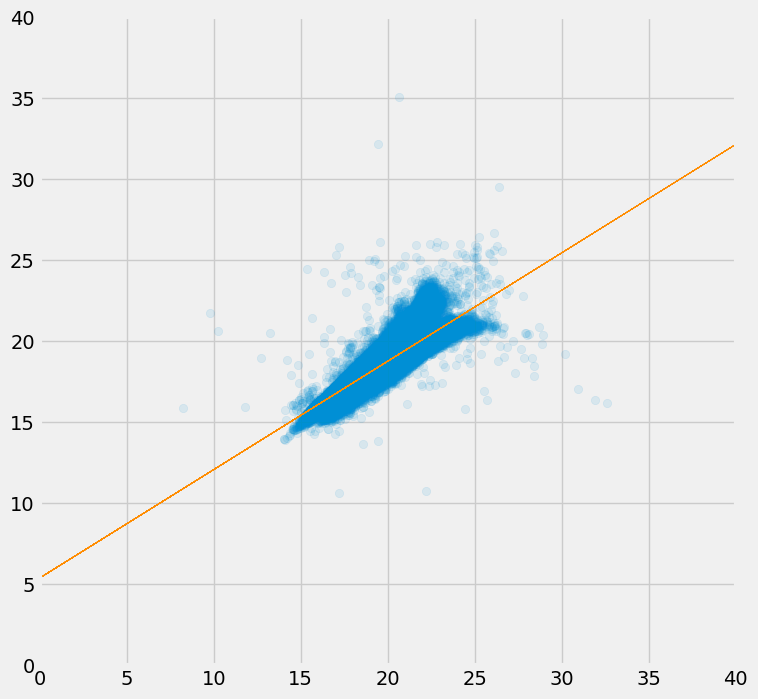

In [69]:
plt.figure(figsize=(8,8))
plt.scatter(X,y,alpha = .1)
plt.plot(X,p,color='darkorange', linewidth=.5)
plt.xlim(0,40)
plt.ylim(0, 40)

scikit-learn을 이용한 로지스틱 회귀

In [72]:
X = trn.drop('type', axis = 1)
y = trn['type'].values

print(X.shape, y.shape)

(199991, 21) (199991,)


In [74]:
np.unique(y) # y의 고유값들 반환

array(['GALAXY', 'QSO', 'REDDEN_STD', 'ROSAT_D', 'SERENDIPITY_BLUE',
       'SERENDIPITY_DISTANT', 'SERENDIPITY_FIRST', 'SERENDIPITY_MANUAL',
       'SERENDIPITY_RED', 'SKY', 'SPECTROPHOTO_STD', 'STAR_BHB',
       'STAR_BROWN_DWARF', 'STAR_CARBON', 'STAR_CATY_VAR', 'STAR_PN',
       'STAR_RED_DWARF', 'STAR_SUB_DWARF', 'STAR_WHITE_DWARF'],
      dtype=object)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression()
lr.fit(X,y)
p = lr.predict_proba(X)

sklearn.linear_model 모듈에서 LogisticRegression 함수를 불러오고, sklearn.metrics에서 log_loss 와 roc_auc_scire 함수를 불러옵니다.

log_loss는 로지스틱 회귀를 학습/평가할 때 사용하는 손실함수이며, roc_auc_score는 분류 모델의 성능을 측정할 때 사용하는 대표적인 지표입니다.

In [80]:
print(p[1, :])

[3.41133649e-002 6.22872890e-001 4.86041591e-002 2.11906957e-002
 1.18063148e-001 1.39162103e-002 1.11409102e-002 1.05188198e-080
 3.93084469e-003 1.31841072e-044 4.85016645e-002 4.76422718e-002
 6.63695899e-005 7.30909150e-003 1.24221870e-002 2.35481248e-110
 2.31913821e-003 3.57889362e-003 4.32816114e-003]


In [81]:
lr.coef_, lr.intercept_

(array([[ 3.49373670e-02,  2.20207043e-01,  4.02016970e-02,
          1.46035008e-01,  2.31074753e-01,  5.87249082e-02,
         -4.74692838e-03,  5.16729080e-04,  9.45536825e-02,
          7.30016050e-02,  1.18894015e-01,  3.78301682e-02,
         -9.97312132e-02, -1.39143869e-01, -1.33413602e-01,
         -1.53216683e-01,  1.71275465e-01, -1.81579679e-01,
         -1.06588511e-01, -1.23897008e-01, -2.19819778e-01],
        [ 3.68107554e-02, -1.77492987e-01, -7.36340481e-02,
         -2.80551651e-02,  3.43137245e-02,  6.04645262e-02,
         -1.48435979e-01,  3.36322287e-03, -2.06520479e-02,
          4.50826529e-02,  6.69892554e-02, -8.22733953e-02,
         -1.81600997e-03,  4.27229450e-02,  1.22946507e-01,
          7.75104979e-02, -1.02220180e-01,  1.16885534e-02,
          5.00852229e-02,  1.08414361e-01,  1.52737671e-01],
        [ 3.53603601e-02, -6.51508651e-02, -1.01586380e-01,
         -2.50859380e-02, -1.19003840e-02, -3.04603363e-02,
          3.92120775e-02,  3.84040225e

In [82]:
log_loss(y,p)

1.821238576593883

In [85]:
score = roc_auc_score(y,p, multi_class= 'ovr')

print(f"AUC score : {score:.4f}")

AUC score : 0.6944


In [87]:
from kaggler.metrics import plot_roc_curve, plot_pr_curve


ModuleNotFoundError: No module named 'kaggler'

NameError: name 'plot_roc_curve' is not defined

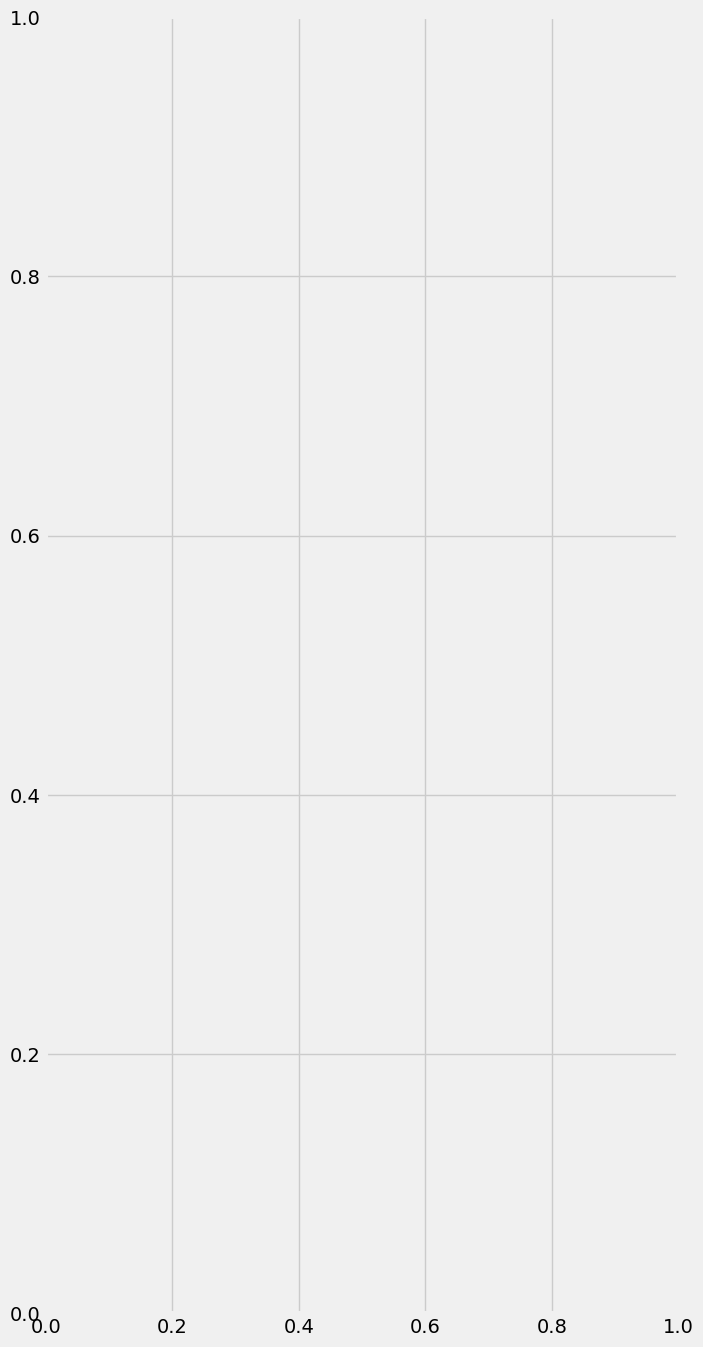

In [88]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plot_roc_curve(y, p);
plt.title('AUC Curve')
plt.subplot(1, 2, 2)
plot_pr_curve(y, p);
plt.title('Precision-Recall Curve')